<a href="https://colab.research.google.com/github/AJSTYLE-lab/Introduction-to-Data-Sciecne-IDS-Course/blob/main/MINI%20PROJECTS/TASK%231_L21_7692_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTING LIBRARIES

In [ ]:
from sklearn.model_selection import KFold

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#IMPORTING .xlsx FILE

In [ ]:
file=pd.read_excel("CollectedData.xlsx","Sheet2")
column = list(file.columns)

DELETING COLUMNS

In [ ]:
column = list(file.columns)
i=0
file.rename(columns={column[i]:'COLUMN#'+str(i) for i in range(len(column)) } , inplace=True)

#*****************************************RENAMING NAME*****************************************
file.rename(columns = {'COLUMN#2':'AGE', 'COLUMN#21':'Clo', 'COLUMN#18':'Met', 'COLUMN#25':'Dewpt', 'COLUMN#26':'PlaneRadTemp', 'COLUMN#36':'Ta', 'COLUMN#37':'Tmrt', 'COLUMN#39':'Vel', 'COLUMN#41':'AirTurb', 'COLUMN#42':'Pa', 'COLUMN#43':'Rh', 'COLUMN#73':'TaOutdoor', 'COLUMN#76':'RhOutdoor' ,'COLUMN#7':'AMV','COLUMN#48':'PMV'}, inplace = True)
#*****************************************DROPING OTHER COLUMNS*****************************************
FILE=pd.DataFrame(file)
ARRAY=[15]
ARRAY=[2,21,18,25,26,36,37,39,41,42,43,73,7,47]
FILE.drop(FILE.columns[[68,58,79,67,75,77,54,55,56,57,58,59,60,61,62,63,64,65,66,72,78,74,71,70,69,0,1,3, 4,5,6,8,9,10,11,12,13,14,15,16,17,19,20,22,23,24,27,28,29,30,31,32,33,34,35,38,40,44,45,46,47,49,50,51,52,53]], axis=1, inplace=True)
FILE.columns

Index(['AGE', 'AMV', 'Met', 'Clo', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt',
       'Vel', 'AirTurb', 'Pa', 'Rh', 'PMV', 'TaOutdoor', 'RhOutdoor'],
      dtype='object')

FINDING DATATYPES

In [ ]:
FILE.dtypes


AGE             float64
AMV             float64
Met             float64
Clo             float64
Dewpt           float64
PlaneRadTemp    float64
Ta              float64
Tmrt            float64
Vel             float64
AirTurb         float64
Pa              float64
Rh              float64
PMV             float64
TaOutdoor       float64
RhOutdoor       float64
dtype: object

COUNT OF NULL VALUES COLUMNS HAVE

In [ ]:
LENGTH=len(FILE)
print("COUNT OF NULL VALUES.")
FILE.isnull().sum()




COUNT OF NULL VALUES.


AGE             2915
AMV               55
Met             1887
Clo             1406
Dewpt           3551
PlaneRadTemp    7021
Ta                20
Tmrt            3701
Vel             3700
AirTurb         5600
Pa              4655
Rh                35
PMV              696
TaOutdoor       1368
RhOutdoor         19
dtype: int64

In [ ]:
FILE.describe()

,AGE,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
count,9650.000000,12510.000000,10678.000000,11159.000000,9014.000000,5544.000000,12545.000000,8864.000000,8865.000000,6965.000000,7910.000000,12530.000000,11869.000000,11197.000000,12546.000000
mean,308.637202,0.100584,1.065907,0.778503,13.621447,0.217785,23.179187,23.450693,0.112445,18.265870,5.123996,42.528507,-0.073711,17.175087,61.098939
std,680.115105,1.102012,0.428882,0.221999,5.903044,1.041164,1.432984,1.502489,0.079044,25.041109,8.156136,15.061475,0.538025,10.665415,24.704364
min,0.000000,-3.000000,0.100000,0.150000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.000000,7.400000,-4.170000,-24.900000,0.000000
25%,26.000000,-0.700000,1.000000,0.630000,9.600000,-0.230000,22.300000,22.589671,0.068000,0.320000,1.226667,29.300000,-0.400000,11.350000,53.769937
50%,35.000000,0.000000,1.100000,0.751700,14.100000,0.200000,23.136667,23.359219,0.100000,0.500000,1.550667,43.276815,-0.030000,18.200000,68.795799
75%,45.000000,1.000000,1.241468,0.880000,17.337500,0.600000,23.900000,24.250000,0.140000,38.815000,1.985333,55.500188,0.260000,26.600000,76.950000
max,1996.000000,3.000000,4.500000,2.130000,26.896750,11.700000,31.000000,37.445000,1.880000,102.450000,27.700000,79.300000,2.500000,32.350000,100.350000


OUTLIER FUNCTION:

In [ ]:
def outliers(FILE):
    q1 = FILE.quantile(0.25)
    q3 = FILE.quantile(0.75)
    i_q_r = q3 - q1
    outliers = FILE[(FILE< (FILE - 1.5 * i_q_r)) | (FILE > (q3 + 1.5 * i_q_r))]
    return outliers

In [ ]:
print('OUTLIERS IN AGE COLUMN={}'.format(len(outliers(FILE['AGE']))))
print('OUTLIERS IN PMV COLUMN={}'.format(len(outliers(FILE['PMV']))))
print('OUTLIERS IN AMV COLUMN={}'.format(len(outliers(FILE['AMV']))))
print('OUTLIERS IN Met COLUMN={}'.format(len(outliers(FILE['Met']))))
print('OUTLIERS IN Rh COLUMN={}'.format(len(outliers(FILE['Rh']))))
print('OUTLIERS IN Pa COLUMN={}'.format(len(outliers(FILE['Pa']))))
print('OUTLIERS IN Ta COLUMN={}'.format(len(outliers(FILE['Ta']))))
print('OUTLIERS IN RhOutdoor COLUMN={}'.format(len(outliers(FILE['RhOutdoor']))))
print('OUTLIERS IN TaOutdoor COLUMN={}'.format(len(outliers(FILE['TaOutdoor']))))
print('OUTLIERS IN Dewpt COLUMN={}'.format(len(outliers(FILE['Dewpt']))))
print('OUTLIERS IN PlaneRadTemp COLUMN={}'.format(len(outliers(FILE['PlaneRadTemp']))))
print('OUTLIERS IN Tmrt COLUMN={}'.format(len(outliers(FILE['Tmrt']))))
print('OUTLIERS IN Vel COLUMN={}'.format(len(outliers(FILE['Vel']))))
print('OUTLIERS IN AirTurb COLUMN={}'.format(len(outliers(FILE['PlaneRadTemp']))))
print('OUTLIERS IN Clo COLUMN={}'.format(len(outliers(FILE['Clo']))))


OUTLIERS IN AGE COLUMN=1359
OUTLIERS IN PMV COLUMN=104
OUTLIERS IN AMV COLUMN=0
OUTLIERS IN Met COLUMN=382
OUTLIERS IN Rh COLUMN=0
OUTLIERS IN Pa COLUMN=1349
OUTLIERS IN Ta COLUMN=359
OUTLIERS IN RhOutdoor COLUMN=0
OUTLIERS IN TaOutdoor COLUMN=0
OUTLIERS IN Dewpt COLUMN=0
OUTLIERS IN PlaneRadTemp COLUMN=232
OUTLIERS IN Tmrt COLUMN=214
OUTLIERS IN Vel COLUMN=309
OUTLIERS IN AirTurb COLUMN=232
OUTLIERS IN Clo COLUMN=360


MAKING HISTOGRAM

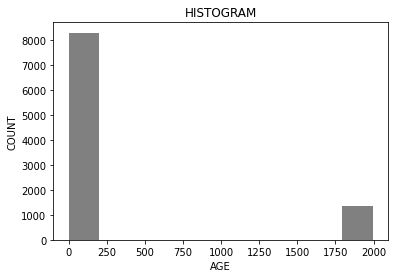

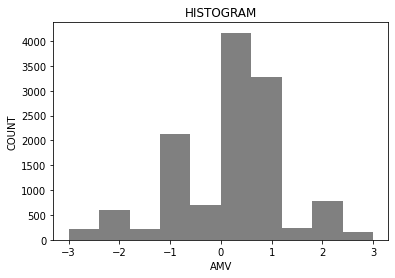

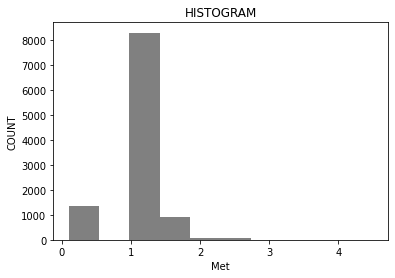

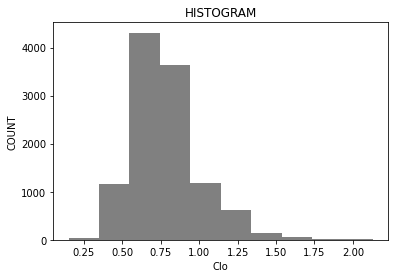

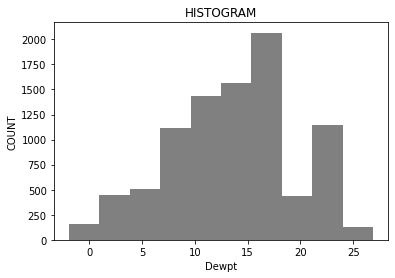

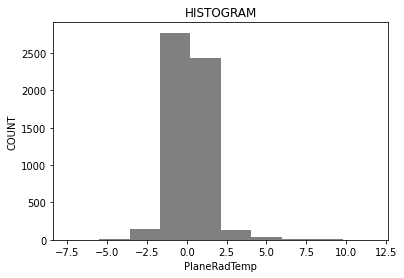

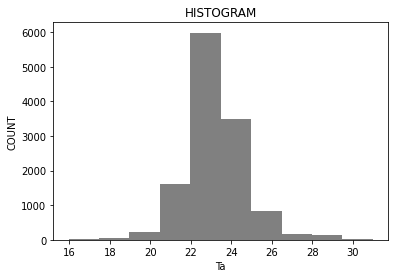

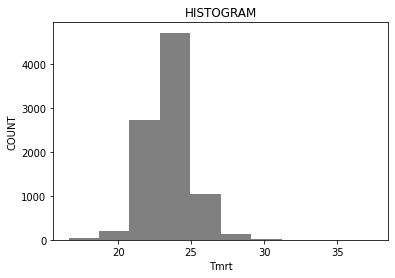

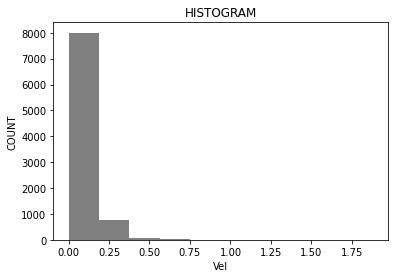

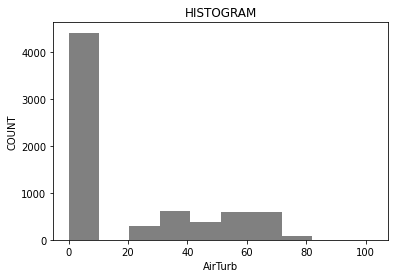

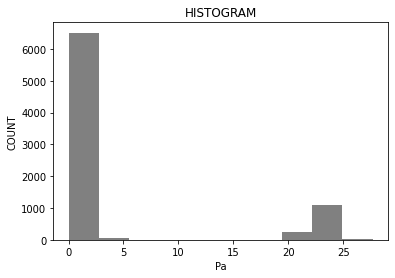

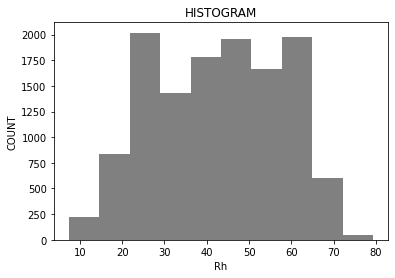

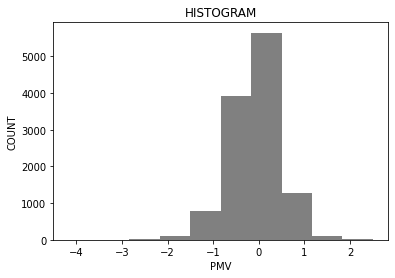

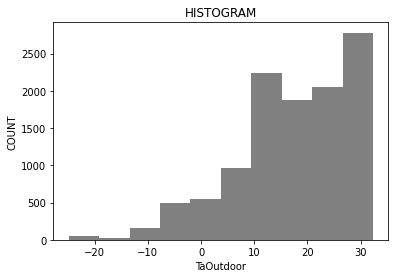

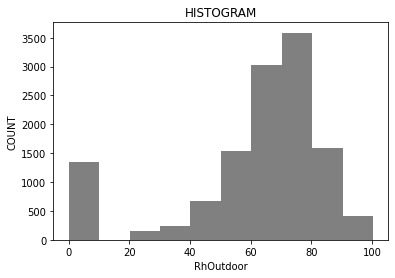

In [ ]:
for i in range (0,15):
  h=FILE[FILE.columns[i]]
  plt.hist(h,color='grey',bins=10)
  plt.title("HISTOGRAM")
  plt.xlabel(FILE.columns[i])
  plt.ylabel("COUNT")
  plt.show()


MAKING BOXPLOT

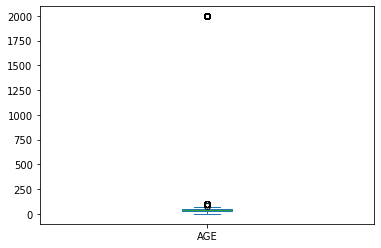

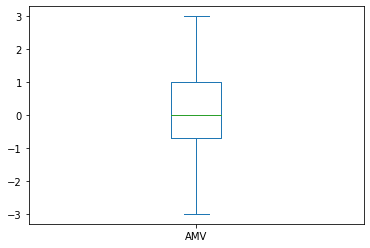

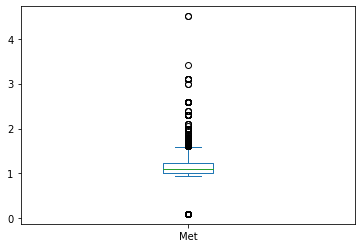

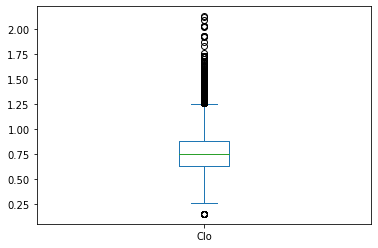

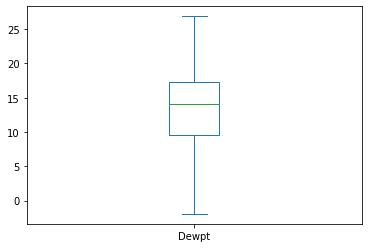

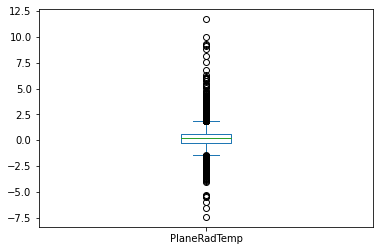

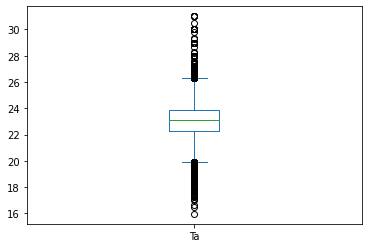

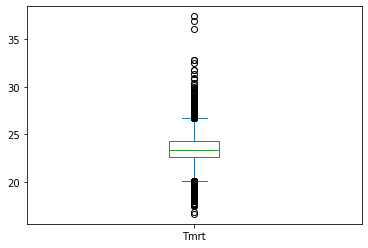

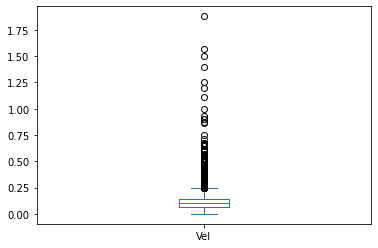

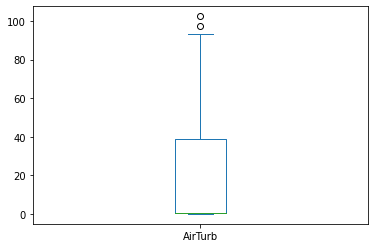

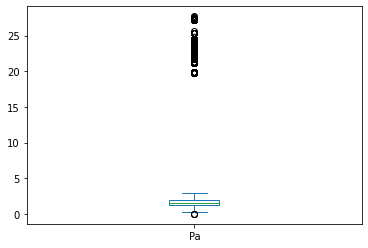

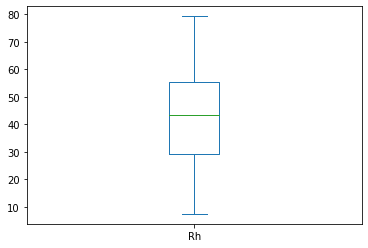

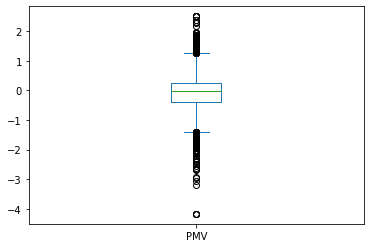

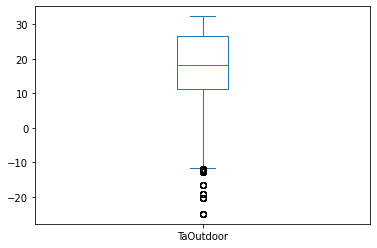

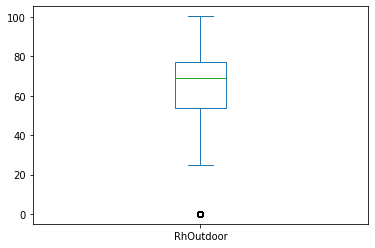

In [ ]:
for i in range(0,15):
    FILE[FILE.columns[i]].plot(kind='box')
    plt.show()

MAKING HEATMAP

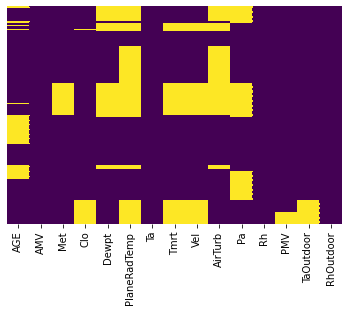

In [ ]:
sns.heatmap(FILE.isna(), yticklabels = False, cbar = False,  cmap = 'viridis')

MAKING HEAT_MAP AGAIN AFTER DELETING NULL VALUES 

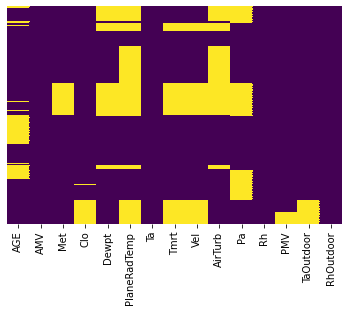

In [ ]:
FILE = FILE.dropna(subset = ['AMV', 'Ta', 'Rh', 'RhOutdoor'])
sns.heatmap(FILE.isnull(), yticklabels = False, cbar = False,  cmap = 'viridis')


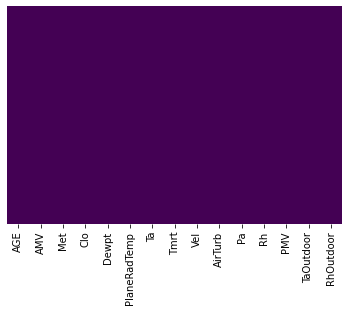

In [ ]:
F= FILE.dropna(subset = ['AMV', 'Ta', 'Rh', 'RhOutdoor','AGE','PMV','AMV','Rh','Clo','Met','Dewpt','PlaneRadTemp','Tmrt','Vel','RhOutdoor','TaOutdoor','Pa'])
sns.heatmap(F.isnull(), yticklabels = False, cbar = False,  cmap = 'viridis')

NOW FILLING NULL VALUES WITH MEAN,MEDIAN,MODE etc

In [ ]:
FILE.drop_duplicates(keep='first',inplace=True)
for j in range(0,15):
  MEDIAN=(FILE[FILE.columns[j]].fillna(FILE[FILE.columns[j]].median(),inplace=True))


NOW MAKING HEATMAP AGAIN AFTER FILLING NULL VALUES 

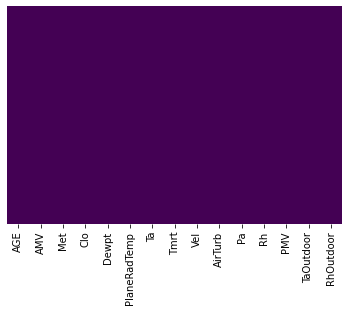

In [ ]:
sns.heatmap(FILE.isnull(), yticklabels = False, cbar = False,  cmap = 'viridis')

CHECKING THE FILE AGIN FILLING WITH MEDIAN VALUE OF EACH COLUMN

In [ ]:
FILE

,AGE,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
0,35.0,2.0,2.1,0.7800,13.800,0.2,19.100000,19.629472,0.06,0.50000,1.525333,51.3,0.51,11.55,79.0
1,35.0,1.0,2.1,1.0500,13.800,0.2,20.000000,19.046655,0.06,0.50000,1.525333,51.9,0.80,11.55,79.0
2,35.0,3.0,2.6,0.4000,13.800,0.2,21.000000,20.153116,0.06,0.50000,1.525333,49.9,0.76,11.55,79.0
3,35.0,3.0,3.0,0.3700,13.800,0.2,23.000000,21.942458,0.06,0.50000,1.525333,45.6,1.47,11.55,79.0
4,35.0,1.0,2.1,1.2900,13.800,0.2,19.800000,19.429333,0.06,0.50000,1.525333,51.4,0.97,11.55,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12560,1996.0,1.0,0.1,0.7517,22.122,0.2,22.142437,23.350000,0.10,67.42325,22.300000,22.9,-0.04,18.20,0.0
12561,1996.0,1.0,0.1,0.7517,22.122,0.2,22.142437,23.350000,0.10,67.42325,22.300000,21.4,-0.04,18.20,0.0
12562,1996.0,1.0,0.1,0.7517,22.122,0.2,22.142437,23.350000,0.10,67.42325,22.300000,23.1,-0.04,18.20,0.0
12563,1996.0,1.0,0.1,0.7517,22.122,0.2,22.142437,23.350000,0.10,67.42325,22.300000,22.0,-0.04,18.20,0.0


CHECKING OUTLIERS AGAIN

In [ ]:
print('OUTLIERS IN AGE COLUMN={}'.format(len(outliers(FILE['AGE']))))
print('OUTLIERS IN PMV COLUMN={}'.format(len(outliers(FILE['PMV']))))
print('OUTLIERS IN AMV COLUMN={}'.format(len(outliers(FILE['AMV']))))
print('OUTLIERS IN Met COLUMN={}'.format(len(outliers(FILE['Met']))))
print('OUTLIERS IN Rh COLUMN={}'.format(len(outliers(FILE['Rh']))))
print('OUTLIERS IN Pa COLUMN={}'.format(len(outliers(FILE['Pa']))))
print('OUTLIERS IN Ta COLUMN={}'.format(len(outliers(FILE['Ta']))))
print('OUTLIERS IN RhOutdoor COLUMN={}'.format(len(outliers(FILE['RhOutdoor']))))
print('OUTLIERS IN TaOutdoor COLUMN={}'.format(len(outliers(FILE['TaOutdoor']))))
print('OUTLIERS IN Dewpt COLUMN={}'.format(len(outliers(FILE['Dewpt']))))
print('OUTLIERS IN PlaneRadTemp COLUMN={}'.format(len(outliers(FILE['PlaneRadTemp']))))
print('OUTLIERS IN Tmrt COLUMN={}'.format(len(outliers(FILE['Tmrt']))))
print('OUTLIERS IN Vel COLUMN={}'.format(len(outliers(FILE['Vel']))))
print('OUTLIERS IN AirTurb COLUMN={}'.format(len(outliers(FILE['PlaneRadTemp']))))
print('OUTLIERS IN Clo COLUMN={}'.format(len(outliers(FILE['Clo']))))


OUTLIERS IN AGE COLUMN=1050
OUTLIERS IN PMV COLUMN=121
OUTLIERS IN AMV COLUMN=0
OUTLIERS IN Met COLUMN=763
OUTLIERS IN Rh COLUMN=0
OUTLIERS IN Pa COLUMN=1645
OUTLIERS IN Ta COLUMN=341
OUTLIERS IN RhOutdoor COLUMN=0
OUTLIERS IN TaOutdoor COLUMN=0
OUTLIERS IN Dewpt COLUMN=363
OUTLIERS IN PlaneRadTemp COLUMN=2693
OUTLIERS IN Tmrt COLUMN=817
OUTLIERS IN Vel COLUMN=911
OUTLIERS IN AirTurb COLUMN=2693
OUTLIERS IN Clo COLUMN=493


In [ ]:
for i in outliers(FILE['AGE']):
    FILE['AGE'] = np.where(FILE['AGE'] == i, FILE['AGE'].median(), FILE['AGE'])
for i in outliers(FILE['Met']):
    FILE['Met'] = np.where(FILE['Met'] == i, FILE['Met'].median(), FILE['Met'])
for i in outliers(FILE['Clo']):
    FILE['Clo'] = np.where(FILE['Clo'] == i, FILE['Clo'].median(), FILE['Clo'])
for i in outliers(FILE['Dewpt']):
    FILE['Dewpt'] = np.where(FILE['Dewpt'] == i, FILE['Dewpt'].median(), FILE['Dewpt'])
for i in outliers(FILE['PlaneRadTemp']):
    FILE['PlaneRadTemp'] = np.where(FILE['PlaneRadTemp'] == i,FILE['PlaneRadTemp'].median(),FILE['PlaneRadTemp'])
for i in outliers(FILE['Ta']):
    FILE['Ta'] = np.where(FILE['Ta'] == i, FILE['Ta'].median(), FILE['Ta'])
for i in outliers(FILE['Tmrt']):
    FILE['Tmrt'] = np.where(FILE['Tmrt'] == i, FILE['Tmrt'].median(),FILE['Tmrt'])
for i in outliers(FILE['Vel']):
    FILE['Vel'] = np.where(FILE['Vel'] == i, FILE['Vel'].median(), FILE['Vel'])
for i in outliers(FILE['AirTurb']):
    FILE['AirTurb'] = np.where(FILE['AirTurb'] == i,FILE['AirTurb'].median(),FILE['AirTurb'])
for i in outliers(FILE['Pa']):
    FILE['Pa'] = np.where(FILE['Pa'] == i, FILE['Pa'].median(), FILE['Pa'])
for i in outliers(FILE['PMV']):
    FILE['PMV'] = np.where(FILE['PMV'] == i, FILE['PMV'].median(), FILE['PMV'])
for i in outliers(FILE['TaOutdoor']):
    FILE['TaOutdoor'] = np.where(FILE['TaOutdoor'] == i,FILE['TaOutdoor'].median(), FILE['TaOutdoor'])
for i in outliers(FILE['RhOutdoor']):
    FILE['RhOutdoor'] = np.where(FILE['RhOutdoor'] == i, FILE['RhOutdoor'].median(), FILE['RhOutdoor'])


FINDING VARIANCE

In [ ]:
FILE.var()

AGE              28.263521
AMV               1.227722
Met               0.096930
Clo               0.016165
Dewpt            14.092324
PlaneRadTemp      0.181566
Ta                1.318610
Tmrt              0.580709
Vel               0.000628
AirTurb           0.009326
Pa                0.059921
Rh              220.733763
PMV               0.247381
TaOutdoor       103.796383
RhOutdoor       523.279907
dtype: float64

In [ ]:
FILE.describe()

,AGE,AMV,Met,Clo,Dewpt,PlaneRadTemp,Ta,Tmrt,Vel,AirTurb,Pa,Rh,PMV,TaOutdoor,RhOutdoor
count,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000,12068.000000
mean,32.354325,0.074942,1.058853,0.719726,12.470708,0.053434,23.001667,23.031304,0.090253,0.449593,1.414785,43.050779,-0.091983,17.260592,62.666000
std,5.316345,1.108026,0.311335,0.127140,3.753974,0.426106,1.148307,0.762043,0.025055,0.096571,0.244788,14.857112,0.497375,10.188051,22.875312
min,0.000000,-3.000000,0.100000,0.150000,-1.953000,-7.420000,15.960000,16.610000,0.000000,0.000000,0.283000,7.400000,-3.210000,-24.900000,0.000000
25%,30.000000,-0.800000,1.000000,0.640000,10.990000,0.200000,22.300000,22.890000,0.080000,0.428571,1.416317,30.401643,-0.390000,11.888889,55.000000
50%,35.000000,0.000000,1.117000,0.751700,13.800000,0.200000,23.130000,23.350000,0.100000,0.500000,1.525333,43.982135,-0.040000,18.200000,69.000000
75%,35.000000,1.000000,1.200000,0.784200,13.800000,0.200000,23.700000,23.350000,0.100000,0.500000,1.525333,55.900000,0.230000,25.600000,77.000000
max,42.000000,3.000000,1.500000,1.000000,18.010000,0.200000,25.790000,24.040000,0.130000,0.606000,1.688837,79.300000,1.160000,32.350000,100.350000


VARIANCE THRESHOLD

In [ ]:
ARRAY= FILE[['AGE', 'AMV', 'Met', 'Clo', 'Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt', 'Vel', 'AirTurb', 'Pa', 'Rh', 'PMV', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
v_t = VarianceThreshold(threshold = 0)

In [ ]:
v_t.fit(ARRAY)

VarianceThreshold(threshold=0)

In [ ]:
v_t.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

MAKING HEATMAP AGAIN

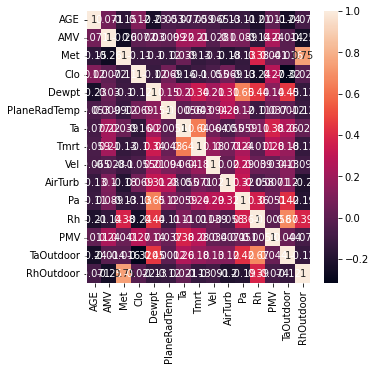

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(FILE.corr(), annot = True)

CALCULATING ENTROPY

In [ ]:
FILE = FILE.drop(labels = ['Dewpt', 'PlaneRadTemp', 'Ta', 'Tmrt'], axis = 1)

DEFINING FUNCTION THAT WILL CALCULATE ENTROPY

In [ ]:
def calculate_entropy(COLUMN):
    prob = COLUMN.value_counts(normalize = True)
    entropy = -1 * np.sum(np.log2(prob) * prob)
    return round(entropy, 3)

In [ ]:
print('Entropy of Age Column: {}'.format(calculate_entropy(FILE['AGE'])))
print('Entropy of AMV Column: {}'.format(calculate_entropy(FILE['AMV'])))
print('Entropy of PMV Column: {}'.format(calculate_entropy(FILE['PMV'])))
print('Entropy of Clo Column: {}'.format(calculate_entropy(FILE['Clo'])))
print('Entropy of Rh Column: {}'.format(calculate_entropy(FILE['Rh'])))
print('Entropy of Pa Column: {}'.format(calculate_entropy(FILE['Pa'])))
print('Entropy of Vel Column: {}'.format(calculate_entropy(FILE['Vel'])))
print('Entropy of AirTurb Column: {}'.format(calculate_entropy(FILE['AirTurb'])))
print('Entropy of Met Column: {}'.format(calculate_entropy(FILE['Met'])))
print('Entropy of TaOutdoor Column: {}'.format(calculate_entropy(FILE['TaOutdoor'])))





Entropy of Age Column: 2.873
Entropy of AMV Column: 3.525
Entropy of PMV Column: 7.499
Entropy of Clo Column: 6.526
Entropy of Rh Column: 10.962
Entropy of Pa Column: 5.157
Entropy of Vel Column: 3.709
Entropy of AirTurb Column: 3.257
Entropy of Met Column: 4.675
Entropy of TaOutdoor Column: 7.743


CALCULATING GAIN

In [ ]:
def calculate_IG(df, target, feature):
    target_entropy = calculate_entropy(df[target])
    entropy_list = []
    weight_list = []
    for i in df[feature].unique():
        feature_level = df[df[feature] == i]
        entropy_level = calculate_entropy(feature_level[target])
        entropy_list.append(round(entropy_level, 3))
        weight_level = len(feature_level) / len(df)
        weight_list.append(round(weight_level, 3))
    remaining_entropy = np.sum(np.array(entropy_list) * np.array(weight_list))
    information_gain = target_entropy - remaining_entropy
    return information_gain

In [ ]:
FILE['AMV'] = FILE['AMV'].astype(int)
for i in FILE.drop(columns = 'AMV').columns:
    info_gain = calculate_IG(FILE, 'AMV', i)
    print(i)
    print(round(info_gain, 3))

AGE
0.017
Met
0.265
Clo
0.226
Vel
0.167
AirTurb
0.288
Pa
0.658
Rh
1.219
PMV
0.246
TaOutdoor
0.399
RhOutdoor
0.386


***************************************************

In [ ]:
df=FILE
X = FILE[['AGE', 'Met', 'Clo','Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
y = df.drop(X, axis = 1)

In [ ]:
y.head()

,AMV,PMV
0,2,0.51
1,1,0.80
2,3,0.76
3,3,-0.04
4,1,0.97


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)

In [ ]:
object = MinMaxScaler()
object.fit_transform(X_train)

array([[0.57142857, 0.79400293, 0.51482353, ..., 0.55898833, 0.86724891,
        0.67918677],
       [0.83333333, 0.72642857, 0.84705882, ..., 0.36385873, 0.64454148,
        0.55206776],
       [0.83333333, 0.72642857, 0.82352941, ..., 0.15634555, 0.43144105,
        0.73492775],
       ...,
       [0.47619048, 0.99268649, 0.70788235, ..., 0.63391013, 0.72227074,
        0.62282013],
       [0.57142857, 0.64285714, 0.74611765, ..., 0.81868215, 0.91625425,
        0.81265571],
       [0.83333333, 0.78571429, 0.62352941, ..., 0.61685426, 0.77379913,
        0.81215745]])

In [ ]:
object.fit_transform(X_test)

array([[0.5952381 , 0.72642857, 0.78823529, ..., 0.3020979 , 0.45327511,
        0.68510214],
       [0.47619048, 0.85080449, 0.38823529, ..., 0.74405594, 0.92227074,
        0.69257598],
       [0.83333333, 0.        , 0.70788235, ..., 0.1972028 , 0.75283843,
        0.        ],
       ...,
       [0.73809524, 0.7367138 , 0.59618824, ..., 0.65529062, 0.96069869,
        0.54663271],
       [0.5952381 , 0.72642857, 0.75294118, ..., 0.24195804, 0.3371179 ,
        0.49626308],
       [0.61904762, 0.63798147, 0.84705882, ..., 0.7020979 , 0.7580786 ,
        0.60787245]])

In [ ]:
p_x = df[['AGE', 'Vel', 'AirTurb', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
p_y = df['PMV']

In [ ]:
f_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'forward')

In [ ]:
f_s.fit(p_x, p_y)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [ ]:
f_s.get_support()

array([ True,  True,  True, False, False,  True,  True])

In [ ]:
X_train_pfs = X_train[['AGE', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
y_train_pfs = y_train['PMV']

In [ ]:
X_test_pfs = X_test[['AGE', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
y_test_pfs = y_test[['PMV']]
lreg_ = LinearRegression()

In [ ]:
lreg_.fit(X_train_pfs, y_train_pfs)

LinearRegression()

In [ ]:
y_pred = lreg_.predict(X_test_pfs)

In [ ]:
lreg_.score(X_test_pfs, y_pred)

1.0

In [ ]:
b_s = sfs(LinearRegression(), n_features_to_select = 5, direction = 'backward')

In [ ]:
b_s.fit(p_x, p_y)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression(),
                          n_features_to_select=5)

In [ ]:
b_s.get_support()

array([ True,  True,  True, False, False,  True,  True])

In [ ]:
X_train_pbs = X_train[['AGE', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]

In [ ]:
y_train_pbs = y_train['PMV']

In [ ]:
X_test_pbs = X_test[['AGE', 'Pa', 'Rh', 'TaOutdoor', 'RhOutdoor']]